# Predicción de Diabetes mediante Árboles de Decisión
## Comprensión empresarial
El diagnóstico temprano de enfermedades crónicas es fundamental para los sistemas de salud modernos. La diabetes, en particular, es una afección que puede gestionarse eficazmente si se detecta a tiempo, evitando complicaciones graves a largo plazo. Mediante el uso de indicadores biométricos (como los niveles de glucosa, la presión arterial o el índice de masa corporal), las instituciones médicas pueden implementar modelos predictivos que ayuden al personal sanitario a realizar diagnósticos más rápidos y precisos, optimizando los recursos médicos y mejorando la calidad de vida de los pacientes.

## Descripción del problema
El Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales busca una forma automatizada de identificar si un paciente tiene o no diabetes basándose en medidas diagnósticas específicas. El desafío consiste en construir un modelo de Machine Learning basado en Árboles de Decisión que sea capaz de clasificar correctamente a los pacientes (positivo o negativo). Para ello, es necesario procesar los datos clínicos, seleccionar las variables más influyentes y optimizar el modelo para asegurar que las predicciones sean fiables y útiles en un entorno médico real.

# Exploratory Data Analysis (EDA)
### 0. Importar liberías

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import parallel_coordinates
from sklearn import tree

import math
import json

import pickle

### 1. Carga de información

In [2]:
link = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(link)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2. Exploración y limpieza
**2.1. Comprensión de datos**

In [3]:
print(f'El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataframe contiene 768 filas y 9 columnas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* `Pregnancies`. Número de embarazos del paciente (numérico)
* `Glucose`. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
* `BloodPressure`. Presión arterial diastólica (medida en mm Hg) (numérico)
* `SkinThickness`. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
* `Insulin`. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
* `BMI`. Índice de masa corporal (numérico)
* `DiabetesPedigreeFunction`. Función de pedigrí de diabetes (numérico)
* `Age`. Edad del paciente (numérico)
* `Outcome`. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico) TARGET

**2.2. Identificando nulos y duplicados**

In [5]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [6]:
num_duplicados = df.duplicated().sum()[df.duplicated().sum()>0]

print(f"Número de filas duplicadas encontradas: {num_duplicados}")

Número de filas duplicadas encontradas: []


**2.3. Eliminando información irrelevante**

Debido a que no hay nulos, ni duplicados no se elimina información. Ademas el dataframe no cuenta con una columna de ID que debamos eliminar

### 3. Análisis univariante
**3.1. Dividir el Dataset en categoricos y numericos**

In [8]:
df_copy = df.copy()
df_copy.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [9]:
info_data = df_copy.dtypes
numerical_column = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_column = df_copy.select_dtypes(include=['object']).columns.tolist()

**3.2. Análisis sobre variables categóricas**

Al no haber columnas categóricas pasamos al siguiente

**3.2. Análisis sobre variables numéricas**

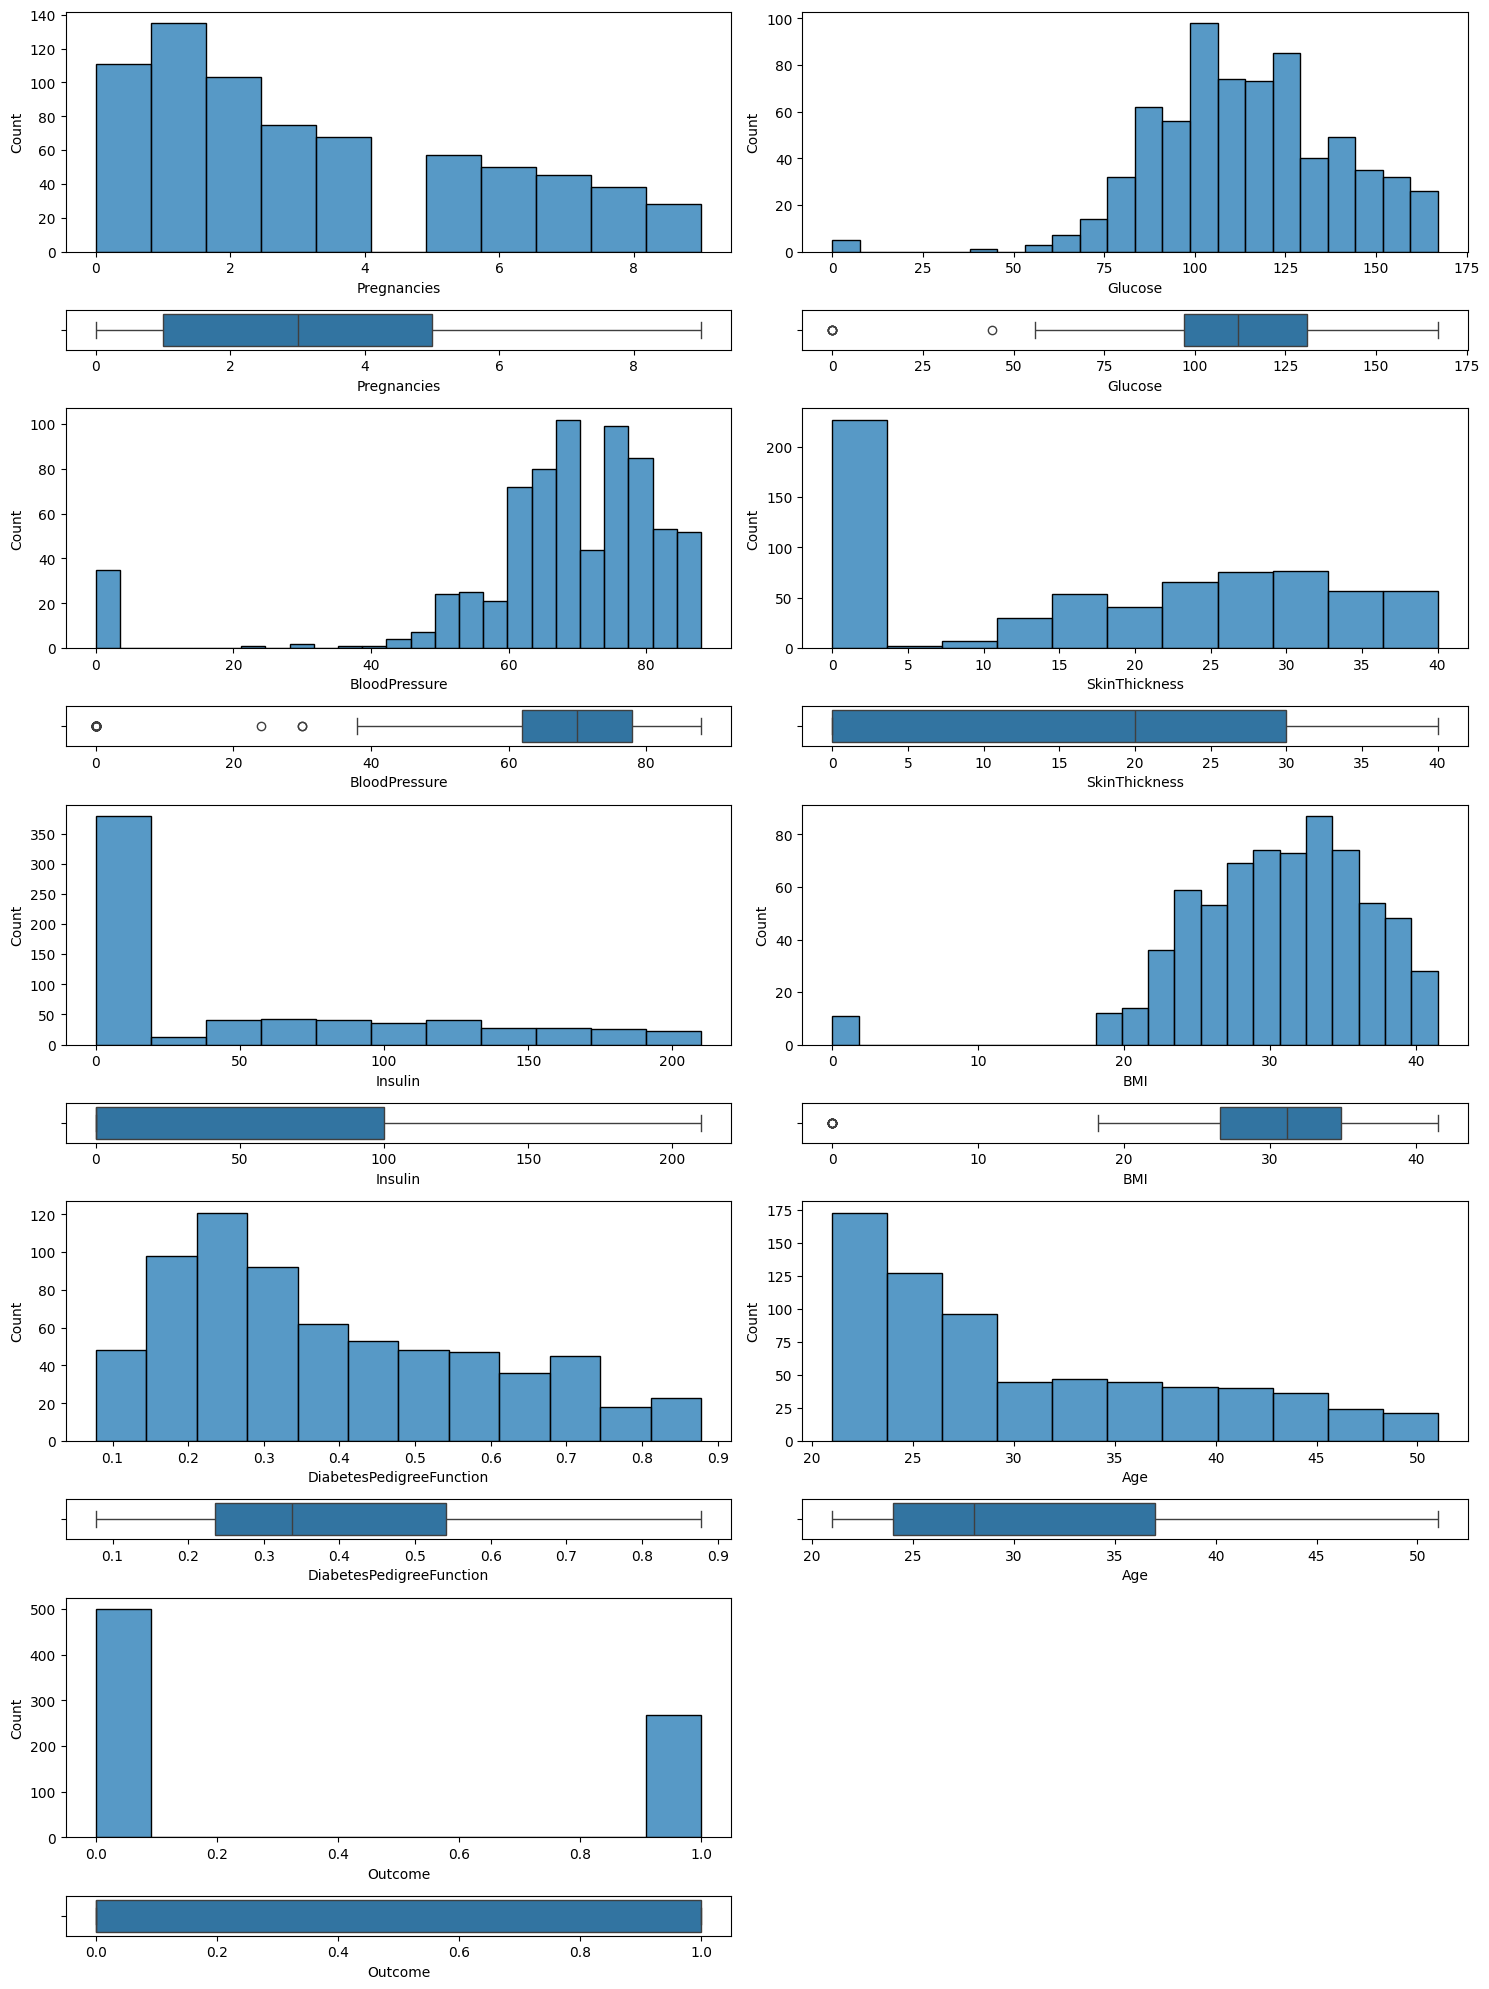

In [10]:
n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = df_copy[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()

* Distribuciones Asimétricas a la Derecha (Right-skewed): Variables como `Pregnancies`, `Insulin`, `DiabetesPedigreeFunction` y `Age` presentan una clara asimetría a la derecha. En el caso de `Pregnancies`, la mayoría de las pacientes tienen entre 0 y 4 embarazos, con casos aislados que llegan hasta 17. `Insulin` muestra una concentración masiva en valores bajos, con una cola larga hacia valores altos. `Age` refleja que la mayoría de los sujetos en el estudio son jóvenes (entre 20 y 30 años), disminuyendo drásticamente la frecuencia conforme aumenta la edad.

* Distribuciones Aproximadamente Normales: Variables como `Glucose`, `BloodPressure` y `BMI` muestran distribuciones que tienden a la simetría, centradas alrededor de una media. `Glucose` tiene una forma de campana bastante definida centrada cerca de los 120 mg/dL. `BMI` (Índice de Masa Corporal) se agrupa de forma equilibrada alrededor de 30-35, lo cual es típico en datos biológicos, aunque presenta una ligera desviación.

* Presencia de Outliers (Valores Atípicos): `Glucose`, `BloodPressure` presentan outliers hacia la izquierda. `BMI` también tiene orientada a 0 pero deben ser datos sin medir ya que no es posible


* Valores Cero o Clínicamente Imposibles: `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` y `Glucose` tienen barras prominentes en el valor 0. Dado que una presión arterial o un IMC de cero no son compatibles con la vida, estos valores deben interpretarse como datos faltantes (nulls) que fueron codificados como 0 y requerirán tratamiento antes de entrenar el árbol de decisión.

### 4. Análisis multivariante
**4.1. Codificación de valor categorico - numericos**

- Sin columnas categóricas

**4.2. Numerico-Numerico Análisis**

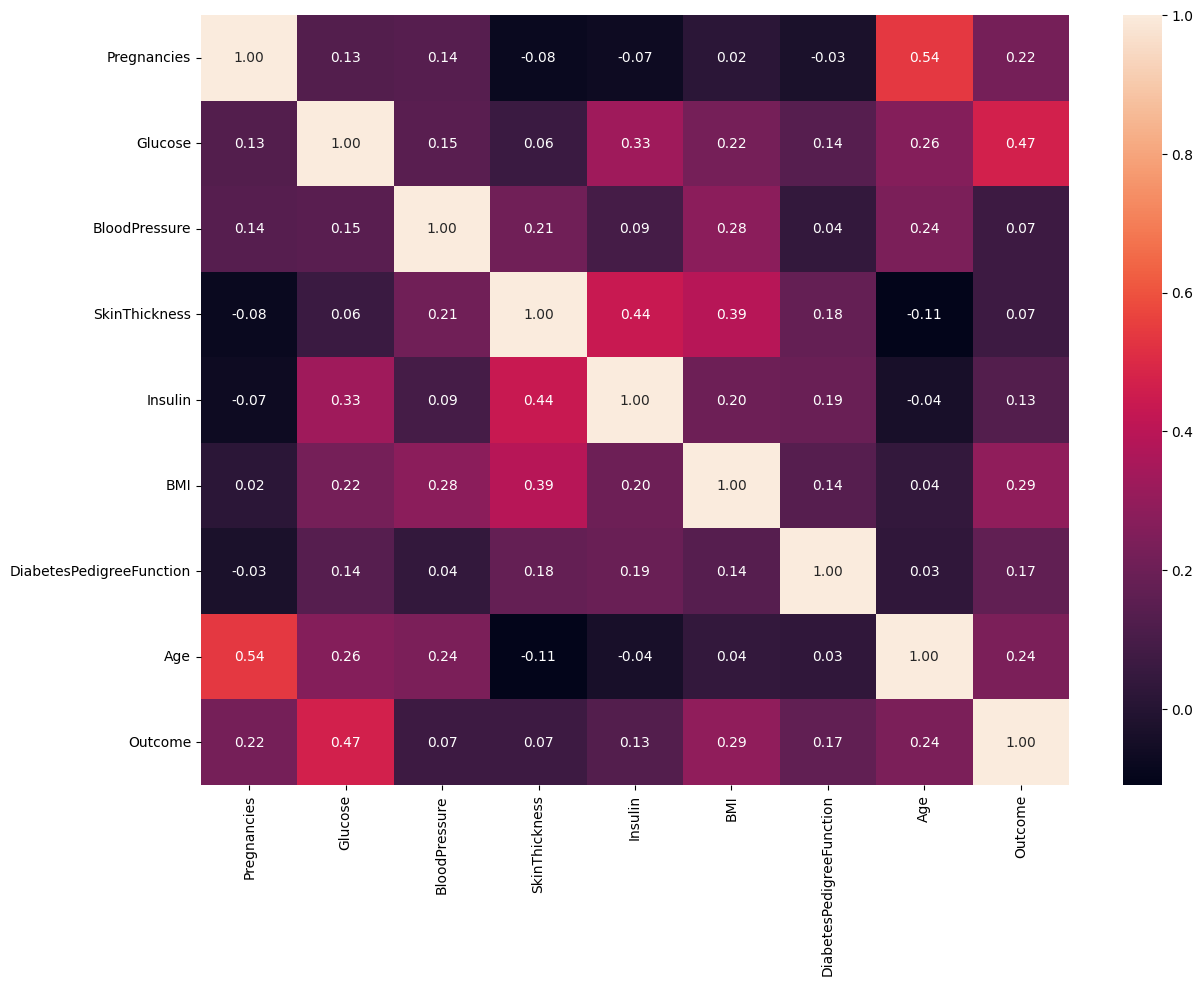

In [11]:
plt.figure(figsize=(14,10))

df_onlyn =  df_copy[numerical_column]

sns.heatmap(df_onlyn.corr().round(2), annot = True, fmt = ".2f")

plt.show()

* Parece haber una fuerte correlación entre `Age` y `Pregnancies`, también con `Glucose` y `Outcome` esta siendo ligada mas a que la glucosa en sangre demuestra si tienes diabetes o no por lo que tiene sentido. 
* Otras fuertemente destacables son `SkinThickness` junto `Insulin` y `BMI`, también `Insulin` y `Glucose` 

**4.3. Categorico-Categorico Análisis**
- Sin categóricas

### 5. Ingeniería de características
**5.1. Análisis de outliers**

In [15]:
cols_imposibles_cero = [
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'Glucose'
]

Como vimos hay valores que no son clinicamente posibles asi que los quitamos antes de ver los outliers 

In [16]:
df_enc = df_copy.copy()
df_enc[cols_imposibles_cero] = df_enc[cols_imposibles_cero].replace(0, np.nan)
df_enc.corr().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.253240,0.365818,0.283289,0.325505,0.314298,0.323876,0.189902,0.314047,0.352885
std,0.325780,0.282991,0.286413,0.300558,0.297685,0.314173,0.312475,0.300824,0.261515
min,-0.033523,0.128135,-0.002805,0.100239,0.082171,0.021719,-0.033523,0.025841,0.170589
25%,0.082171,0.223192,0.170589,0.166816,0.130395,0.155382,0.033561,0.166816,0.221898
50%,0.128135,0.232771,0.223192,0.226839,0.220261,0.232771,0.130395,0.238356,0.259491
75%,0.221898,0.494650,0.289230,0.259491,0.303454,0.313680,0.155382,0.330107,0.313680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las siguientes columnas continuas fueron identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


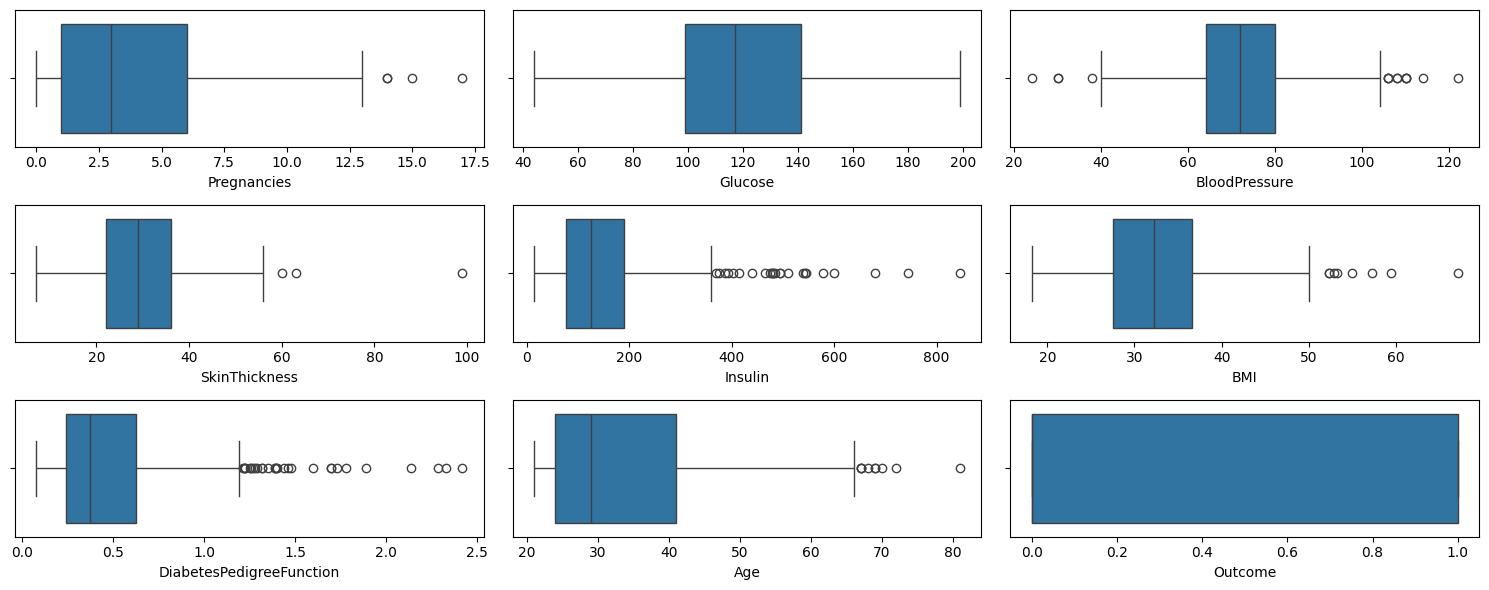

In [17]:
lista_col = list(df_enc.select_dtypes(('float64', 'int64'))) 
print(f"Las siguientes columnas continuas fueron identificadas: {lista_col}")
n = len(lista_col)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(df_enc[lista_col]):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=df_enc, x=col)

# Oculta subplots vacíos
for idx in range(len(lista_col), n_rows * n_cols):
    row = idx // n_cols
    col_pos = idx % n_cols
    fig.delaxes(axis[row, col_pos])

plt.tight_layout()
plt.show()

In [18]:
# Crear una copia para eliminar outliers
df_enc_no = df_enc.copy()

In [19]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [20]:
# outliers con y sin negativos
f_outliers_with_neg = []
f_outliers_no_neg = []

for each in lista_col:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

In [21]:
df_enc.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
df_enc_no.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.837240,121.686763,72.375171,29.059150,146.500000,32.394716,0.458914,33.199870,0.348958
std,3.344157,30.535641,11.973207,10.057253,90.348842,6.715793,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,57.000000,360.625000,50.250000,1.200000,66.500000,1.000000


**5.2. Dividir el train/test de marcos de datos**

In [26]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train.to_csv(f'../data/processed/X_train_{reference}.csv', index=False)
    X_test.to_csv(f'../data/processed/X_test_{reference}.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
    
    return X_train, X_test, y_train, y_test

In [27]:
objetivo = 'Outcome'

# Separar el DataFrame original 
X_train_con_outliers, X_test_con_outliers, y_train, y_test = split(objetivo, df_enc, 'with_outliers')
X_train_sin_outliers, X_test_sin_outliers, _, _ = split(objetivo, df_enc_no, 'without_outliers')

### 6. Procesamiento de Datos
**6.1. Normalización / Min-Max Scaler**

* No hace falta hacer normalización ni Max-Min en el arbol de decisiones

**6.2. Guardado en archivos xlsx**

In [28]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", 
         "X_test_con_outliers", "X_test_sin_outliers", 
         "y_train", "y_test"]
for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

### 7. Machine Learning
**7.1. Decisión de DataSet y Arbol de decisiones**

In [29]:
train, test = [], []

for var in lista:
    df = pd.read_excel(f"../data/processed/{var}.xlsx")
    if "train" in var:
        train.append((var, df))
    elif "test" in var:
        test.append((var, df))

In [30]:
results_tree = []
models_tree = []

datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers)
]

for name, dataset in datasets:
    #Max_depth: Limita la profundidad del árbol y así evitar sobreajuste
    #Min:samples_split: Minimiza el número de muestras necesarias para dividir un nodo, si es mas pequeño hay sobreajuste
    model_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
    model_tree.fit(dataset, y_train)
    y_pred = model_tree.predict(dataset)
    
    results_tree.append(accuracy_score(y_train, y_pred))
    models_tree.append((name, model_tree))
  


best_index = results_tree.index(max(results_tree))
print("Resultados árbol:", results_tree)
print("Mejor accuracy:", max(results_tree))
print("Mejor dataset:", datasets[best_index][0])

best_dataset_tree = datasets[best_index][1]
best_model_tree = models_tree[best_index][1]

Resultados árbol: [0.8338762214983714, 0.8403908794788274]
Mejor accuracy: 0.8403908794788274
Mejor dataset: X_train_sin_outliers


**7.2. Revisión de datos**

In [32]:
X_train = best_dataset_tree
X_test = X_test_sin_outliers   

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


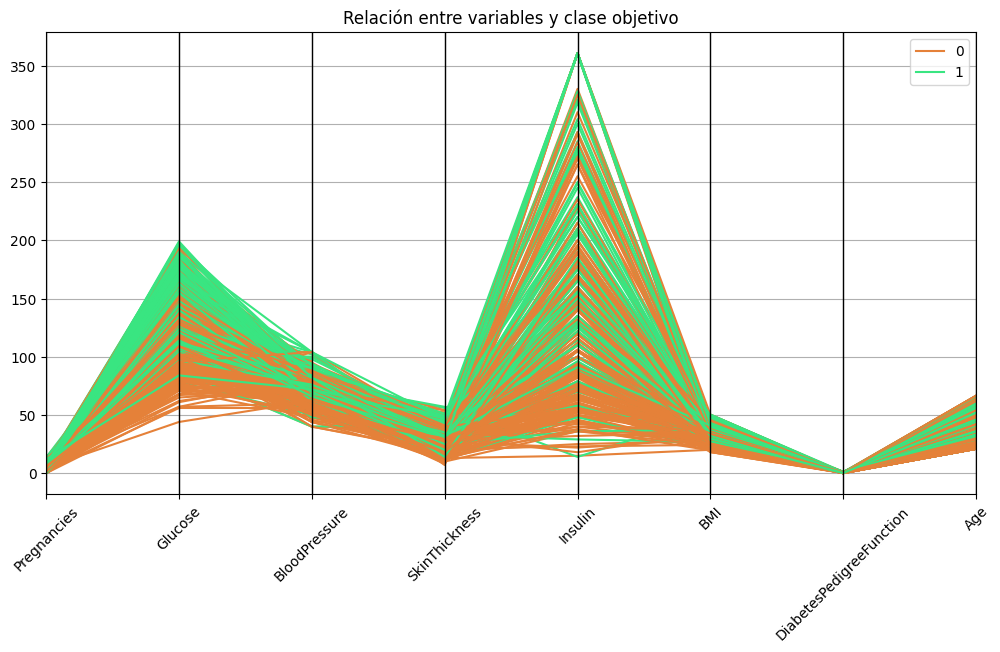

In [33]:
# Combinar X_train con el target para visualizar
total_data = X_train.copy()
total_data["Outcome"] = y_train.values  

# Graficar
plt.figure(figsize=(12, 6))
parallel_coordinates(total_data, "Outcome", color=("#E58139", "#39E581", "#8139E5"))
plt.title("Relación entre variables y clase objetivo")
plt.xticks(rotation=45)
plt.show()

Siendo la leyenda respecto a la columna `Outcome`, se representa con 0 a los pacientes sin diabetes y con 1 a los que si la tienen.

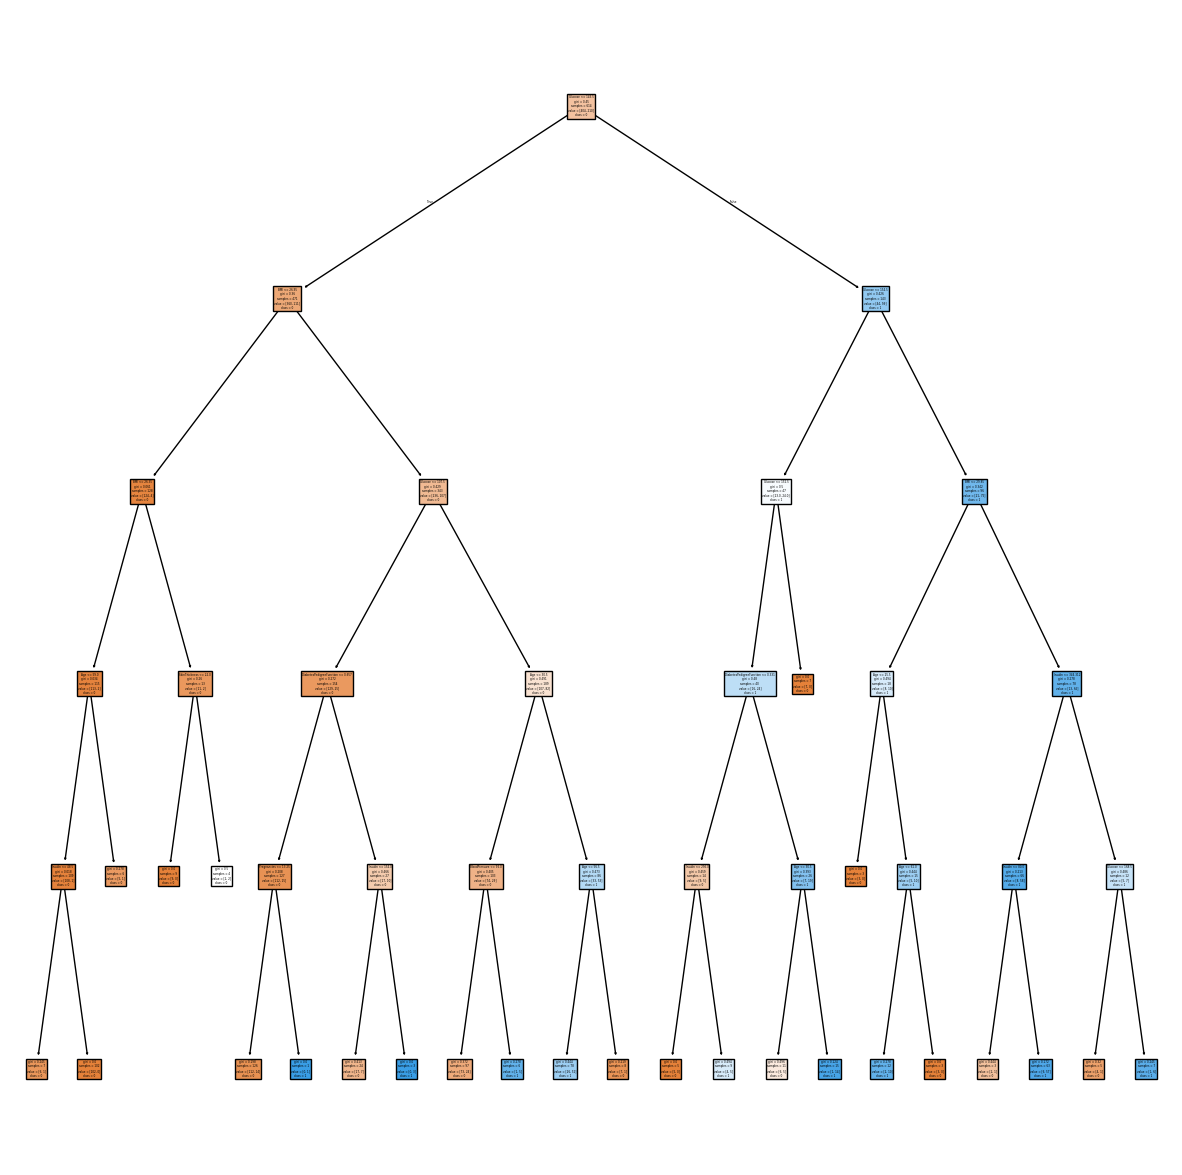

In [34]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(best_model_tree, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

### 8. Guardar el Modelo

In [36]:
with open("../models/decision_tree_classifier_default_42.sav", "wb") as file:
    pickle.dump(best_model_tree, file)